In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ccaModels import CCA_MarkovChain_CUBIC_OG, CCA_MarkovChain_Hybla_discrete, CCA_MarkovChain_Hybla

#plt.rcParams['text.usetex'] = True
plt.rcParams.update(plt.rcParamsDefault)

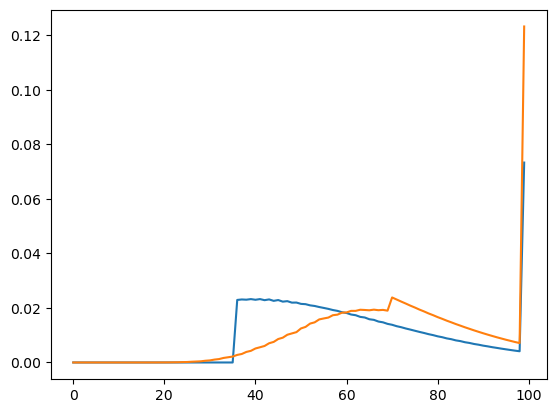

0.036035331551778335

In [4]:
hyb = CCA_MarkovChain_Hybla_discrete(packet_err=0.0006,beta=0.7,N=100,C =1000, RTT_est=0.2, RTT_real = 0.21, RTT0=0.1)

#for b in np.arange(2,20,2):
#    print(hyb.D(hyb.a[1], (b-1)*hyb.W/hyb.N))
#    print(hyb.D(hyb.a[1], hyb.a[b]))
#    print(hyb.D(hyb.a[1], b*hyb.W/hyb.N))
#    print("----")
tp = np.zeros(hyb.N)
for j,_ in enumerate(tp):
    tp[j] = hyb.transition_proba_Hybla(50,j)
plt.plot(tp)
hyb.compute_stationnary_distribution()
plt.plot(hyb.pi)
plt.show()
hyb.avg_throughput()

In [6]:
sum(hyb.P[50,:])

0.9266532202802386

3.621964664966512
6.020404329078785


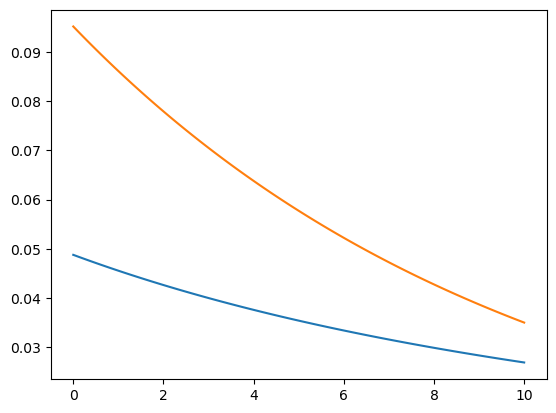

In [23]:
t = np.linspace(0,10,100)
w0 = 100
rtt = 0.5
l = 1/10
e = 0.1
w = w0+t/rtt # cwnd in MSS
b = w/rtt # MSS/s

p = np.exp(-t/(e*b))-np.exp(-(t+1)/(e*b))
pold = np.exp(-l*t)-np.exp(-l*(t+1))

plt.plot(t,p)
plt.plot(t,pold)
print(np.sum(np.exp(-t/(e*b))-np.exp(-(t+1)/(e*b))))
print(np.sum(np.exp(-l*t)-np.exp(-l*(t+1))))

In [1]:
def P(t, eps):
    return (1-eps)**(t-1)*eps

P(1,0.1)+P(2,0.1)

0.19

In [6]:
sum = 0
for i in [1,2,3,4]:
    sum+= P(i,0.1)

print(sum)

0.34390000000000004


In [10]:
import numpy as np
import scipy

P = [[0.19,0.15,0.66],[0.271,0.1385,0.599],[0,0.344,0.656]]

ws,vs = scipy.sparse.linalg.eigs(A=np.transpose(P),k=1,sigma=1)
pi = np.real(vs/vs.sum())[:,0]

print(pi)
print(np.sum(pi))

[0.09018778 0.27032966 0.63948256]
1.0
